In [1]:
# Adam Breda
# Gusti Bagus Dwi Anugrah Harimurti

In [2]:
!pip install pandas
import pandas as pd

!pip install openpyxl

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [4]:
!pip install numpy
import numpy as np

In [5]:
base_oltp = "./assets/oltp"

In [6]:
# Kelurahan Id ditulis dengan 9 digit seperti 6171030001, dan kadang dianggap menjadi notasi ilmiah seperti 6.171031001E9
# Ubah notasi ilmiah menjadi string of int, lalu ubah menjadi int
def scientific_notation_9_kelurahan_id_to_int(cell):
    a = cell.replace(".", "").replace("E9", "")
    return int(a)

### Dimensi Kategori

In [7]:
dim_kategori = pd.read_excel(f"{base_oltp}/master_kategori.xlsx")
dim_kategori = dim_kategori.set_index('category_id')

# Transformasi int64 0 dan 1 menjadi bool
dim_kategori['category_is_food'] = dim_kategori['category_is_food'] == 1
dim_kategori.info()
dim_kategori

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category_name     5 non-null      object
 1   category_is_food  5 non-null      bool  
dtypes: bool(1), object(1)
memory usage: 85.0+ bytes


,category_name,category_is_food
category_id,,
2,CAFE,True
5,JAJANAN,True
3,RESTAURANT,True
1,TOKO/SWALAYAN,False
4,WARUNG MAKAN,True


### Dimensi Driver

In [8]:
dim_driver = pd.read_excel(f"{base_oltp}/master_driver.xlsx").set_index('user_id')
# dim_driver.head()

dim_driver['user_gender'] = dim_driver['user_gender'] == 'L'

dim_driver = dim_driver.rename(columns={'user_gender': 'is_male'})
dim_driver.info()
dim_driver.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 108 to 106
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_name       35 non-null     object        
 1   user_email      35 non-null     object        
 2   user_birthdate  35 non-null     datetime64[ns]
 3   is_male         35 non-null     bool          
 4   user_address    35 non-null     object        
 5   user_lat        35 non-null     float64       
 6   user_lng        35 non-null     float64       
 7   kelurahan_id    35 non-null     int64         
 8   kelurahan_name  35 non-null     object        
 9   kecamatan_name  35 non-null     object        
 10  fleet_id        35 non-null     int64         
 11  fleet_merk      35 non-null     object        
 12  fleet_type      35 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 3.6+ KB


,user_name,user_email,user_birthdate,is_male,user_address,user_lat,user_lng,kelurahan_id,kelurahan_name,kecamatan_name,fleet_id,fleet_merk,fleet_type
user_id,,,,,,,,,,,,,
108,Ana Maimunah Pertiwi S.H.,ana_maimunah_pertiwi_s_h_@gmail.com,1991-12-21,False,"Jl. Pak Benceng No.C7, Sungai Bangkong",-0.052168,109.306711,6171010003,BENUA MELAYU DARAT,PONTIANAK SELATAN,8,Toyota,MOBIL
87,Artanto Eman Wacana S.I.Kom,artanto_eman_wacana_s_i_kom@yahoo.co.id,1983-05-25,True,"Gang Ramin 5 No.76, Tj. Hulu",-0.029319,109.370956,6171020001,PARIT MAYOR,PONTIANAK TIMUR,1,Honda,MOTOR
75,Atma Dasa Uwais,atma_dasa_uwais@gmail.co.id,1985-12-28,True,"Gang Madani, Pal IX",-0.067330,109.297329,6171011001,BANGKA BELITUNG LAUT,PONTIANAK TENGGARA,6,TVS,MOTOR
96,Bakda Gunawan,bakda_gunawan@yahoo.co.id,1995-05-26,True,"Gang Melati 2, Sungai Beliung",-0.008973,109.292455,6171040001,BATU LAYANG,PONTIANAK UTARA,17,KIA,MOBIL
95,Cengkal Marpaung,cengkal_marpaung@yahoo.co.id,1994-12-09,True,"Jl. Padat Karya, Saigon",-0.043819,109.377378,6171020004,TANJUNG HULU,PONTIANAK TIMUR,1,Honda,MOBIL


### Dimensi Kelurahan

In [9]:
dim_kelurahan = pd.read_excel(f"{base_oltp}/master_kelurahan.xlsx").set_index('kelurahan_id')
dim_kelurahan.head()

,kelurahan_name,kecamatan_name
kelurahan_id,,
6171030001,PAL LIMA,PONTIANAK BARAT
6171030008,SUNGAI BELIUNG,PONTIANAK BARAT
6171030006,SUNGAI JAWI DALAM,PONTIANAK BARAT
6171030007,SUNGAI JAWI LUAR,PONTIANAK BARAT
6171031002,DARAT SEKIP,PONTIANAK KOTA


### Dimensi Merchant

In [10]:
def remove_after_dot(s):
    return s.split('.')[0]

dim_merchant = pd.read_excel(f"{base_oltp}/master_merchant.xlsx").astype({'kelurahan_id': 'str'}).set_index('merchant_id')
dim_merchant['kelurahan_id'] = dim_merchant['kelurahan_id'].apply(remove_after_dot)
dim_merchant.info()
dim_merchant.head()
# TODO: Hapus nan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 266 to 62
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category_id           84 non-null     int64  
 1   merchant_name         84 non-null     object 
 2   merchant_address      84 non-null     object 
 3   merchant_address_lat  84 non-null     float64
 4   merchant_address_lng  84 non-null     object 
 5   kelurahan_id          84 non-null     object 
 6   kelurahan_name        81 non-null     object 
 7   kecamatan_name        81 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.9+ KB


,category_id,merchant_name,merchant_address,merchant_address_lat,merchant_address_lng,kelurahan_id,kelurahan_name,kecamatan_name
merchant_id,,,,,,,,
266,4,Bakso 77,"Jalan Mitra Indah Utama 8, Kalimantan Barat 78...",-0.088364,109.349154,nan,NaN,NaN
106,3,KFC SERDAM,"Komp. Lestari 2, Sungai Raya, Kabupaten Kubu R...",-0.077896,109.35664,nan,NaN,NaN
286,2,Warung Kopi & Kuliner Nusantara,Jl. Sei. Raya Dalam No. 29,-0.026330,109.342504,nan,NaN,NaN
20,4,Pondok Rasa,"Jl. Purnama I No.7, Akcaya, Pontianak Sel., Ko...",-0.050195,109.334,6171030001,PAL LIMA,PONTIANAK BARAT
418,1,Indomaret Jalan karet,Jl Karet,-0.009802,109.295136,6171030008,SUNGAI BELIUNG,PONTIANAK BARAT


### Dimensi User

In [11]:
dim_user = pd.read_excel(f"{base_oltp}/master_user.xlsx").set_index('user_id')
dim_user['user_gender'] = dim_user['user_gender'] == 'L'
dim_user = dim_user.rename(columns={'user_gender': 'is_male'})
dim_user.head()

,user_name,user_email,user_birthdate,is_male,user_address,user_lat,user_lng,kelurahan_id,kelurahan_name,kecamatan_name
user_id,,,,,,,,,,
47,Aisyah Farida,aisyah_farida@gmail.co.id,2003-10-28,False,"Jalur Cinday, Batu Layang",0.010186,109.313097,6171030001,PAL LIMA,PONTIANAK BARAT
55,Ajimin Aditya Pangestu,ajimin_aditya_pangestu@gmail.com,2004-04-22,True,"Unnamed Road, Sungai Beliung",-0.001745,109.293638,6171030007,SUNGAI JAWI LUAR,PONTIANAK BARAT
11,Anita Mardhiyah,anita_mardhiyah@yahoo.com,2002-03-13,False,"jln puskesmas gg sejati 2, Sungai Jawi",-0.025152,109.305623,6171030007,SUNGAI JAWI LUAR,PONTIANAK BARAT
8,Argono Daru Tarihoran S.Sos,argono_daru_tarihoran_s_sos@gmail.co.id,1987-02-08,True,"Jalan Bina Jaya, Kota Baru",-0.064516,109.310146,6171031004,MARIANA,PONTIANAK KOTA
51,Artawan Pranowo,artawan_pranowo@yahoo.com,1991-05-07,True,"Jl. Tabrani Ahmad No.50, Sungai Jawi Dalam",-0.021350,109.300646,6171011004,BANSIR DARAT,PONTIANAK TENGGARA


### Fakta Transaksi

In [53]:
import sqlite3

con = sqlite3.connect(f"{base_oltp}/dummy_ojol_transactions_raw_only.sqlite")
fact_transaction = pd.read_sql_query(f"SELECT * FROM dummy_ojol_transactions_raw_only_query_get_transaction_list_koto", con)
fact_transaction = fact_transaction.set_index('id')

# Transform date_process menjadi date_start dan date_end dari str
def split_date_process_start(row):
    s = row['date_process']
    splitted = s.split(" s/d ")
    return splitted[0]
def split_date_process_end(row):
    s = row['date_process']
    splitted = s.split(" s/d ")
    return splitted[1]
date_start = fact_transaction.apply(lambda row: split_date_process_start(row), axis=1)
fact_transaction['date_start'] = pd.to_datetime(date_start)
date_end = fact_transaction.apply(lambda row: split_date_process_end(row), axis=1)
fact_transaction['date_end'] =  pd.to_datetime(date_end)

# Ubah notasi science di kolom kelurahanid menjadi int64
fact_transaction['from_kelurahanid'] = fact_transaction['from_kelurahanid'].apply(scientific_notation_9_kelurahan_id_to_int)
fact_transaction['to_kelurahanid'] = fact_transaction['to_kelurahanid'].apply(scientific_notation_9_kelurahan_id_to_int)

# Split latlng from dan to
def get_lat(cell):
    clean = cell.replace("\t","").replace(" ","") # Atasi "-0.03844709999999999,109.3272303 \t\t\t\t\t\t\..."
    split_by_comma = clean.split(",")
    if len(split_by_comma) == 2:
        return float(split_by_comma[0].strip())
    elif len(split_by_comma) == 1:
        return float(clean[ : clean.find('-', 1)])
    else:
        raise Exception("Format error again")
    
def get_lng(cell):
    # Complicated karena transaction_from_latlng ada data yang rusak
    clean = cell.replace(r"\t","").replace(" ","") # Atasi "-0.03844709999999999,109.3272303 \t\t\t\t\t\t\..."
    clean = cell.split(r" \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t")[0] # Atasi >>-0.03844709999999999,109.3272303 																															-0.03844709999999999<<
    clean = clean.split(' ')[0]
    split_by_comma = clean.split(",")
    return float(split_by_comma[1].strip())
    # try:
    #     if len(split_by_comma) == 2:
    #         return float(split_by_comma[1].strip())
    #     elif len(split_by_comma) == 1:
    #         return float(clean[clean.find('-', 1) : ])
    #     else:
    #         raise Exception("Format error again")
    # except:
    #     print(f">>{repr(cell)}<<")
    

fact_transaction['transaction_from_lat'] = fact_transaction['transaction_from_latlng'].apply(get_lat).astype(float)
fact_transaction['transaction_from_lng'] = fact_transaction['transaction_from_latlng'].apply(get_lng).astype(float)
fact_transaction['transaction_to_lat'] = fact_transaction['transaction_to_latlng'].apply(get_lat).astype(float)

fact_transaction['amount_delivery'] = fact_transaction['amount_delivery'].astype(float)
fact_transaction['amount_merchant'] = fact_transaction['amount_merchant'].astype(float)

# Banyak ada yang formatnya tidak bener misal transaction_from_latlng "-0.03844709999999999,109.3272303 \t\t\t\t\t\t\..."
fact_transaction.loc[fact_transaction['transaction_from_latlng'].str.contains("\t")]

fact_transaction = fact_transaction.drop('date_process', axis=1)
fact_transaction = fact_transaction.drop('transaction_from_latlng', axis=1)
fact_transaction = fact_transaction.drop('transaction_to_latlng', axis=1)
fact_transaction.info()
fact_transaction.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 1617.0 to 2133.0
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mode                      1878 non-null   object        
 1   from_alamat               1878 non-null   object        
 2   from_kelurahanid          1878 non-null   int64         
 3   to_alamat                 1878 non-null   object        
 4   to_kelurahanid            1878 non-null   int64         
 5   distance                  1878 non-null   object        
 6   amount_delivery           1878 non-null   float64       
 7   amount_merchant           1878 non-null   float64       
 8   transaction_amount_total  1878 non-null   object        
 9   customer_id               1878 non-null   object        
 10  driver_id                 1878 non-null   object        
 11  merchant_id               1878 non-null   object        
 12  date_start        

,mode,from_alamat,from_kelurahanid,to_alamat,to_kelurahanid,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id,date_start,date_end,transaction_from_lat,transaction_from_lng,transaction_to_lat
id,,,,,,,,,,,,,,,,,
1617.0,BIKE,"Gang Ikhwan No.16, Sungai Jawi",6171031002,"Jl. Prof. M.Yamin No.3a, Sungai Bangkong",6171010002,5.55,2500.0,0.0,2500.0,67.0,90.0,,2019-03-09 20:45:00,2019-03-09 22:05:00,-0.030328,109.297753,-0.061345
1297.0,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",6171031001,"Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",6171020002,7.08,9000.0,82000.0,91000.0,55.0,77.0,93.0,2019-03-09 19:55:00,2019-03-10 01:38:00,-0.028610,109.329253,-0.028571
1394.0,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",6171031002,"Gg. Gn. Malabar No.21, Sungai Jawi",6171030008,4.02,5000.0,58500.0,63500.0,68.0,75.0,421.0,2019-03-09 19:54:00,2019-03-09 21:44:00,-0.030186,109.335633,-0.022623
1120.0,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",6171031004,"Unnamed Road, Pal IX",6171011002,8.94,12000.0,72000.0,84000.0,8.0,82.0,109.0,2019-03-09 18:56:00,2019-03-10 00:20:00,-0.030581,109.326401,-0.063780
2053.0,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",6171030001,"Pal IX, Kakap River",6171011003,7.93,14400.0,0.0,14400.0,19.0,109.0,,2019-03-09 12:28:00,2019-03-09 17:11:00,-0.018462,109.307568,-0.059239


# Contoh query

In [13]:
sort_quarterly = fact_transaction.groupby(fact_transaction['date_start'].dt.to_period('Q'))

In [14]:
sort_quarterly.keys # Semua quarter dari data

id
1617.0    2019Q1
1297.0    2019Q1
1394.0    2019Q1
1120.0    2019Q1
2053.0    2019Q1
           ...  
1242.0    2018Q3
2911.0    2018Q3
1779.0    2018Q3
1228.0    2018Q3
2133.0    2018Q3
Name: date_start, Length: 1878, dtype: period[Q-DEC]

In [15]:
[str(d) for d in sort_quarterly.keys.tolist()[:3]]

['2019Q1', '2019Q1', '2019Q1']

In [31]:
simplify = {}
for key, it in sort_quarterly:
    simplify[str(key)] = it
simplify['2018Q3']

,mode,from_alamat,from_kelurahanid,to_alamat,to_kelurahanid,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id,date_start,date_end,transaction_from_lat,transaction_from_lng,transaction_to_lat,transaction_to_lng
id,,,,,,,,,,,,,,,,,,
2418.0,SHOP,"Indomaret Kota Baru, Jl Prof M Yamin No 3",6171010006,"Jl. Kesehatan No.1, Kota Baru",6171010003,2.93,3000.0,36500.0,39500.0,16.0,103.0,423.0,2018-09-30 22:17:00,2018-09-30 23:06:00,-0.051404,109.313793,-0.059728,109.314313
1890.0,BIKE,"Jl. Panglima Aim No.1, Dalam Bugis",6171020002,"Jl. Parit Demang Dalam, Parit Tokaya",6171010004,8.21,4000.0,0.0,4000.0,34.0,86.0,,2018-09-30 20:37:00,2018-09-30 22:09:00,-0.033330,109.362684,-0.070833,109.321283
1164.0,FOOD,"Waroeng Murni Sari, Jl. Beringin, Darat Sekip,...",6171031004,"Jl. Purnama II No.87, Kota Baru",6171010004,5.66,7000.0,79500.0,86500.0,37.0,82.0,54.0,2018-09-30 19:30:00,2018-09-30 21:37:00,-0.032696,109.332050,-0.063268,109.319870
2674.0,BIKE,"Komplek Pondok Harapan Kita, Gang Phinisi No. 15",6171030001,"Jl. Pwan Peraman, Siantan Hilir",6171030008,8.0,11000.0,0.0,11000.0,30.0,92.0,,2018-09-30 15:16:00,2018-09-30 19:04:00,0.000925,109.283721,0.002420,109.337679
1600.0,BIKE,"Unnamed Road, Pal IX",6171011002,"Gang Rencana No.17, Sungai Bangkong",6171031005,7.75,3500.0,0.0,3500.0,45.0,81.0,,2018-09-30 14:29:00,2018-09-30 16:07:00,-0.063319,109.273482,-0.038312,109.318775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242.0,FOOD,"Pondok Ale-ale, Gg. Suka Damai No.21, Sungai B...",6171031001,"Jl. Swadaya, Pal IX",6171011001,7.26,9000.0,59000.0,68000.0,71.0,93.0,16.0,2018-09-10 14:27:00,2018-09-10 16:43:00,-0.037180,109.325818,-0.057694,109.283237
2911.0,CAR,"Jl. Tani, Saigon",6171020004,"Gang Hidayah, Pal Lima",6171031003,10.45,18000.0,0.0,18000.0,19.0,99.0,,2018-09-10 13:12:00,2018-09-10 17:22:00,-0.035183,109.371125,-0.031017,109.295263
1779.0,BIKE,"Gg. Dharma Putra 17A, Siantan Hilir",6171040003,"Gg. Losari No.16, Sungai Jawi",6171030007,7.5,3500.0,0.0,3500.0,53.0,80.0,,2018-09-10 10:30:00,2018-09-10 16:55:00,-0.003776,109.345834,-0.027845,109.302605


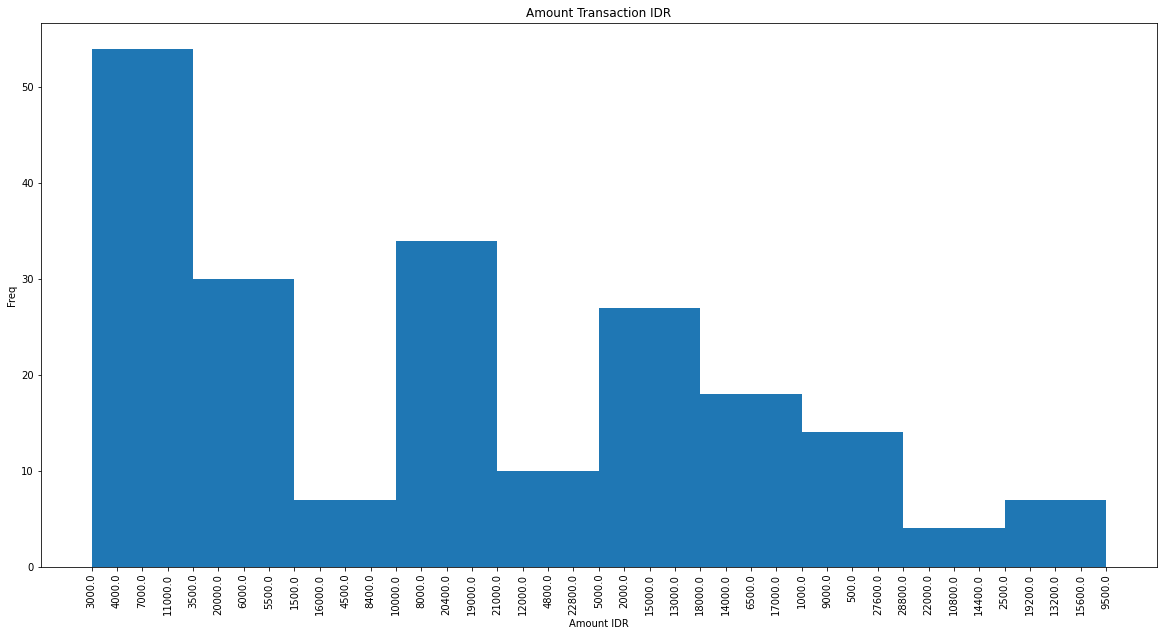

In [67]:
import base64
import matplotlib
from io import BytesIO
matplotlib.use('Agg')

fig = plt.figure(figsize=(20,10))
plt.title("Amount Transaction IDR")
plt.xticks(rotation=90)
plt.xlabel("Amount IDR")
plt.ylabel("Freq")
plt.hist(simplify['2018Q3']['amount_delivery'].to_list())
tmpfile = BytesIO()
plt.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

In [18]:
from IPython.display import display, HTML
for q, it in sort_quarterly:
    print(f"\n\n\n{q}")
    display(HTML(it.head(3).to_html()))




2018Q3


,mode,from_alamat,from_kelurahanid,to_alamat,to_kelurahanid,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id,date_start,date_end,transaction_from_lat,transaction_from_lng,transaction_to_lat,transaction_to_lng
id,,,,,,,,,,,,,,,,,,
2418.0,SHOP,"Indomaret Kota Baru, Jl Prof M Yamin No 3",6171010006,"Jl. Kesehatan No.1, Kota Baru",6171010003,2.93,3000.0,36500.0,39500.0,16.0,103.0,423.0,2018-09-30 22:17:00,2018-09-30 23:06:00,-0.051404,109.313793,-0.059728,109.314313
1890.0,BIKE,"Jl. Panglima Aim No.1, Dalam Bugis",6171020002,"Jl. Parit Demang Dalam, Parit Tokaya",6171010004,8.21,4000.0,0.0,4000.0,34.0,86.0,,2018-09-30 20:37:00,2018-09-30 22:09:00,-0.033330,109.362684,-0.070833,109.321283
1164.0,FOOD,"Waroeng Murni Sari, Jl. Beringin, Darat Sekip, Pontianak Kota, Kota Pontianak, Kalimantan Barat 78243, Indonesia",6171031004,"Jl. Purnama II No.87, Kota Baru",6171010004,5.66,7000.0,79500.0,86500.0,37.0,82.0,54.0,2018-09-30 19:30:00,2018-09-30 21:37:00,-0.032696,109.332050,-0.063268,109.319870





2018Q4


,mode,from_alamat,from_kelurahanid,to_alamat,to_kelurahanid,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id,date_start,date_end,transaction_from_lat,transaction_from_lng,transaction_to_lat,transaction_to_lng
id,,,,,,,,,,,,,,,,,,
2294.0,FOOD,"Jl. Diponegoro No.187-193, Darat Sekip, Pontianak Kota, Kota Pontianak, Kalimantan Barat 78243, Indonesia",6171031004,"Jl. Swadaya, Pal IX",6171011002,8.52,11000.0,23500.0,34500.0,6.0,80.0,363.0,2018-12-31 22:59:00,2019-01-01 00:43:00,-0.029585,109.339033,-0.056421,109.286883
2293.0,FOOD,"Jl. Johar No.90e, Darat Sekip, Pontianak Kota, Kota Pontianak, Kalimantan Barat 78243, Indonesia",6171031001,"Wajok Hulu, Siantan",6171040003,9.53,13000.0,24500.0,37500.0,70.0,82.0,93.0,2018-12-31 19:21:00,2018-12-31 23:15:00,-0.028610,109.329253,0.037131,109.345478
2817.0,BIKE,"Jl. Raya Sungai Kakap No.2, Pal IX",6171011004,"Unnamed Rd, Mega Tim.",6171040001,14.27,20000.0,0.0,20000.0,14.0,94.0,,2018-12-31 11:50:00,2018-12-31 16:02:00,-0.043361,109.279086,-0.016680,109.386185





2019Q1


,mode,from_alamat,from_kelurahanid,to_alamat,to_kelurahanid,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id,merchant_id,date_start,date_end,transaction_from_lat,transaction_from_lng,transaction_to_lat,transaction_to_lng
id,,,,,,,,,,,,,,,,,,
1617.0,BIKE,"Gang Ikhwan No.16, Sungai Jawi",6171031002,"Jl. Prof. M.Yamin No.3a, Sungai Bangkong",6171010002,5.55,2500.0,0.0,2500.0,67.0,90.0,,2019-03-09 20:45:00,2019-03-09 22:05:00,-0.030328,109.297753,-0.061345,109.305406
1297.0,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Johar No.90e, Darat Sekip, Pontianak Kota, Kota Pontianak, Kalimantan Barat 78243, Indonesia",6171031001,"Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",6171020002,7.08,9000.0,82000.0,91000.0,55.0,77.0,93.0,2019-03-09 19:55:00,2019-03-10 01:38:00,-0.028610,109.329253,-0.028571,109.374953
1394.0,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",6171031002,"Gg. Gn. Malabar No.21, Sungai Jawi",6171030008,4.02,5000.0,58500.0,63500.0,68.0,75.0,421.0,2019-03-09 19:54:00,2019-03-09 21:44:00,-0.030186,109.335633,-0.022623,109.319152


In [21]:
# from IPython.display import display, HTML
# HTML(dim_user.to_html())

# Serve di Backend dengan Flask

Karena di serve mempergunakan flask, kode dipindahkan ke file python terpisah, kode dari file tersebut kurang lebih seperti
```
import os
import pandas as pd 
import numpy as np 
import flask
import pickle
from flask import Flask, render_template, request
from flask import Response
import json

template_dir = os.path.abspath(os.path.dirname(__file__))
template_dir = os.path.join(template_dir, 'frontend')
print(template_dir)
app=Flask(__name__, template_folder=template_dir)

@app.route('/')
def index():
    return flask.render_template('index.html')

@app.route('/keys')
def keys():
    keys = sort_quarterly.keys
    return Response(json.dumps(list(simplify.keys())))

@app.route('/byquarter/<q>')
def byquarter(q):
    from IPython.display import display, HTML
    return Response(simplify[q].to_html())

app.run(debug=True, port=3333)
```

Untuk saat ini query yang bisa dihasilkan adalah melihat data transaksi per Quarter per Tahun, tampilan HTML masih barebone sebagai berikut

In [44]:
from IPython.display import Image

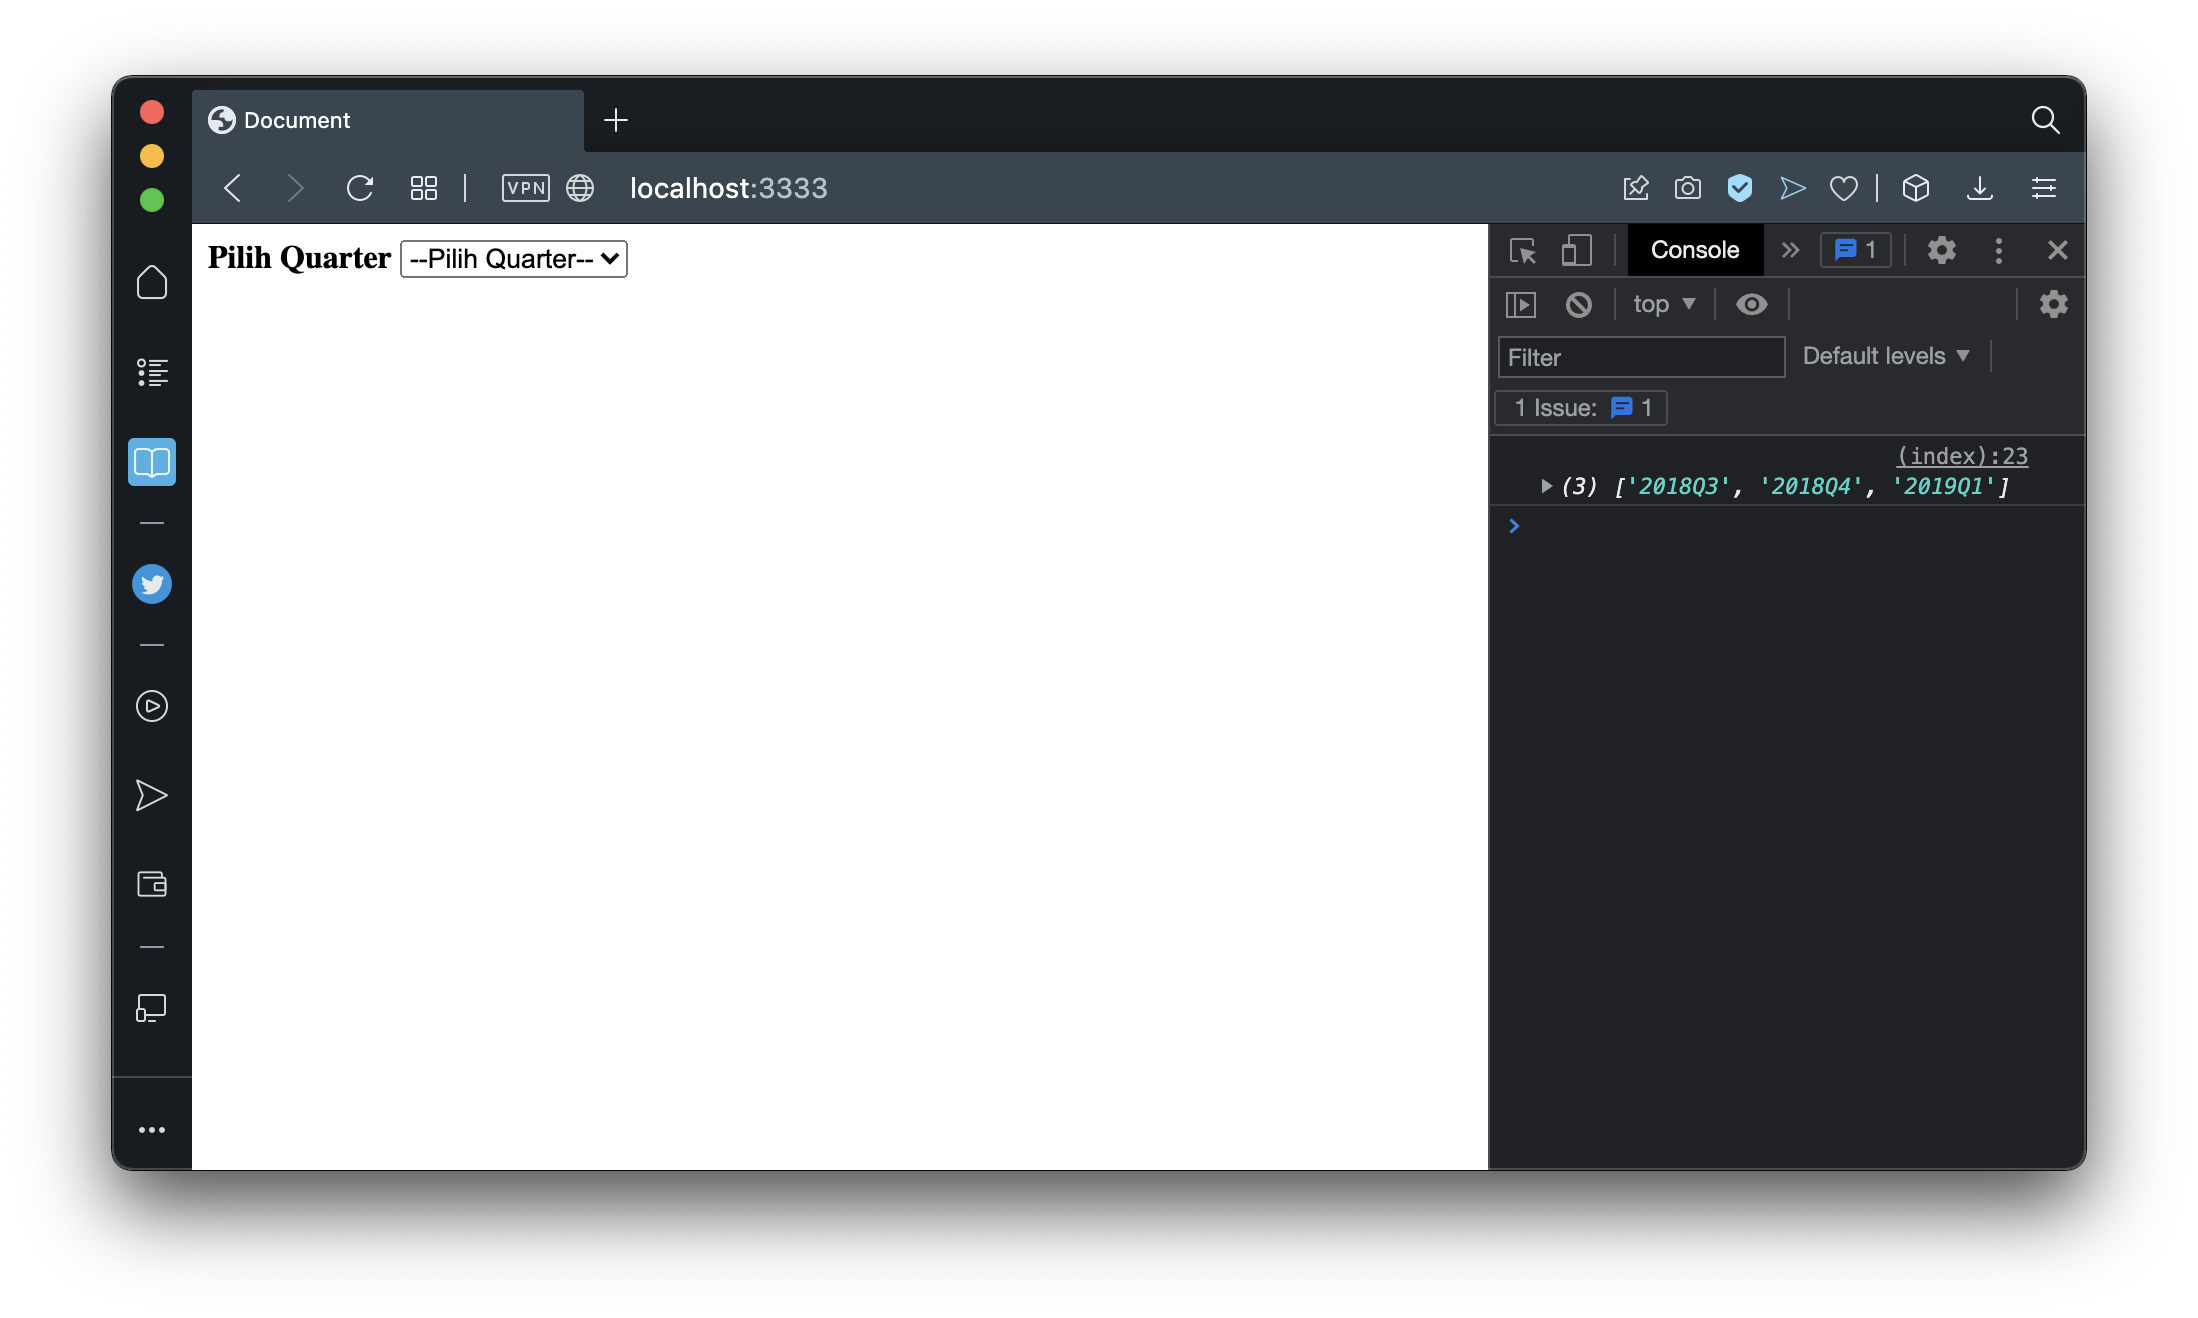

In [55]:
# Tampilan Awal
Image(filename='assets/imgs/init.png', width=980) 

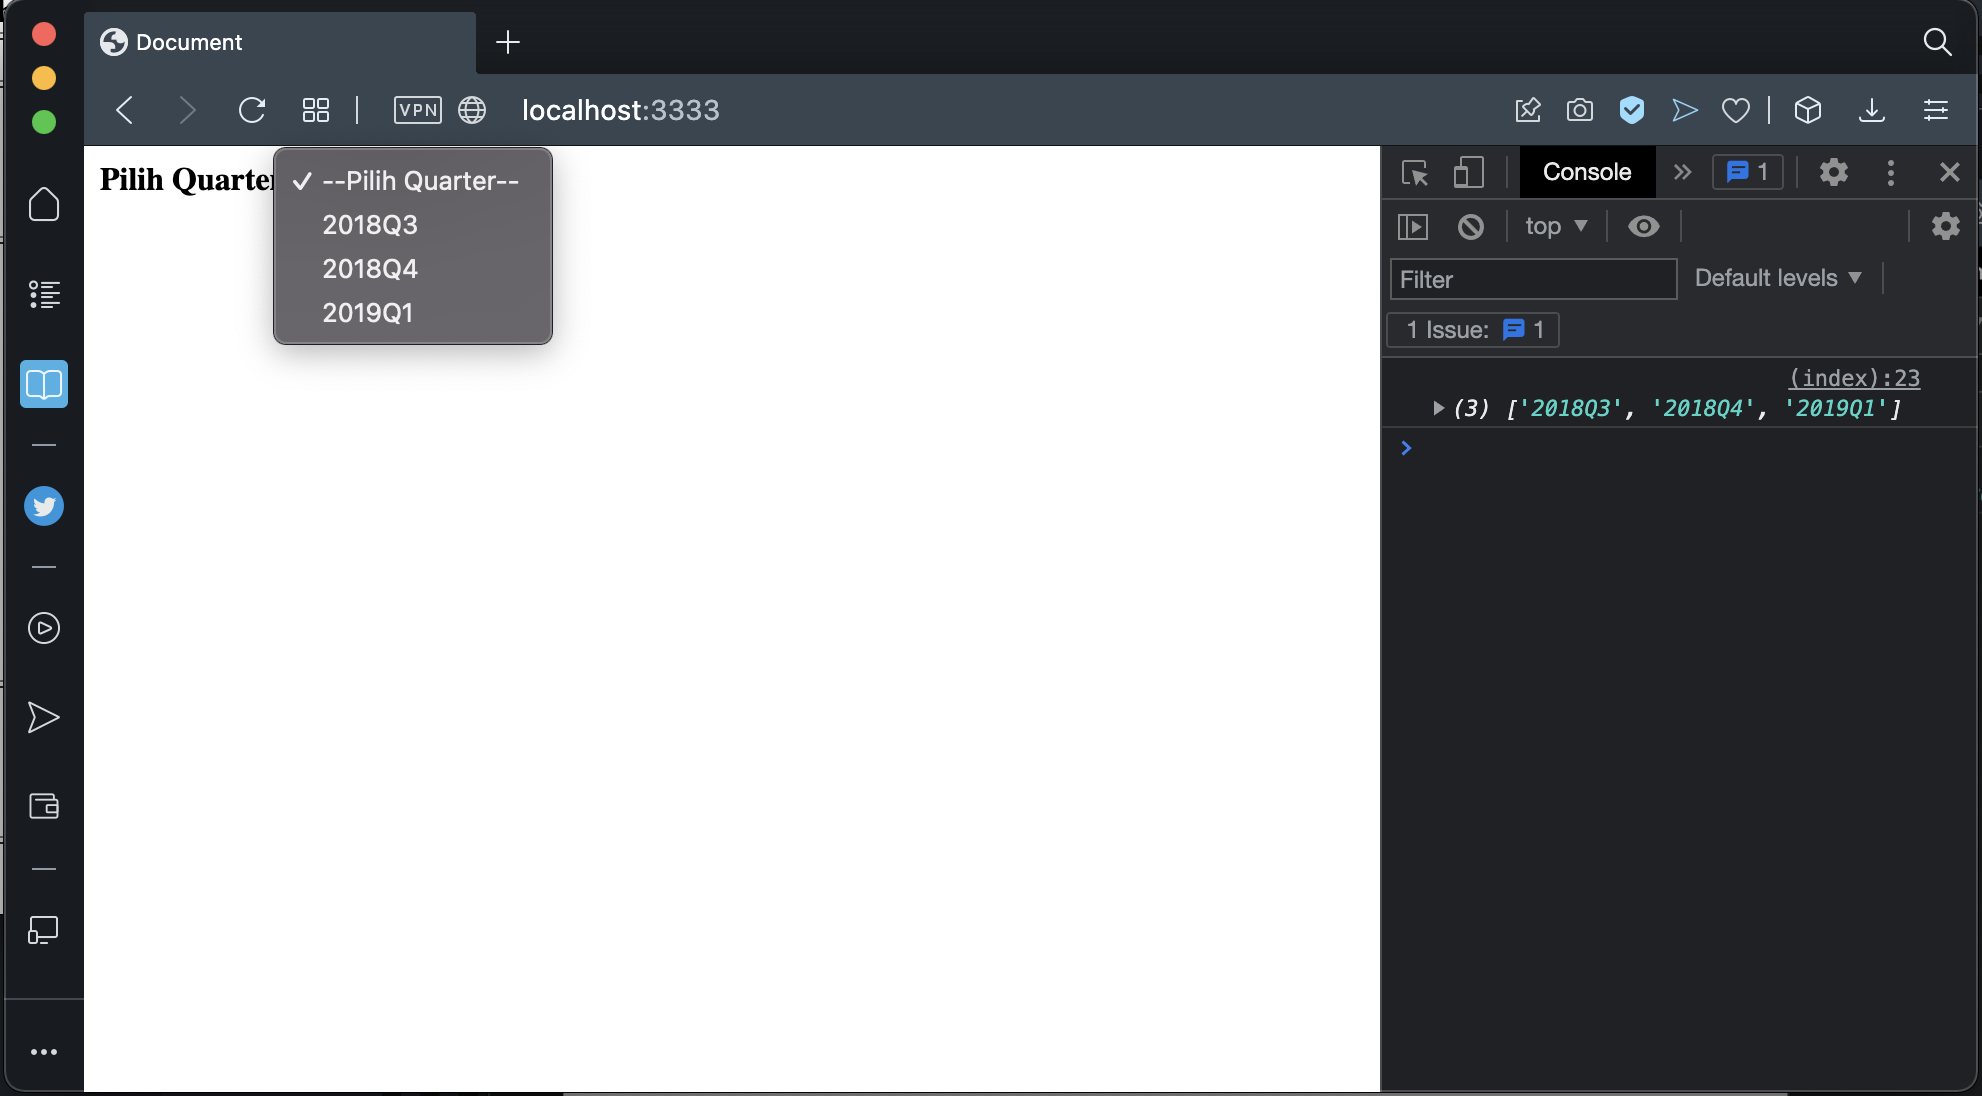

In [56]:
# Memilih Quarter
Image(filename='assets/imgs/select.png', width=980) 

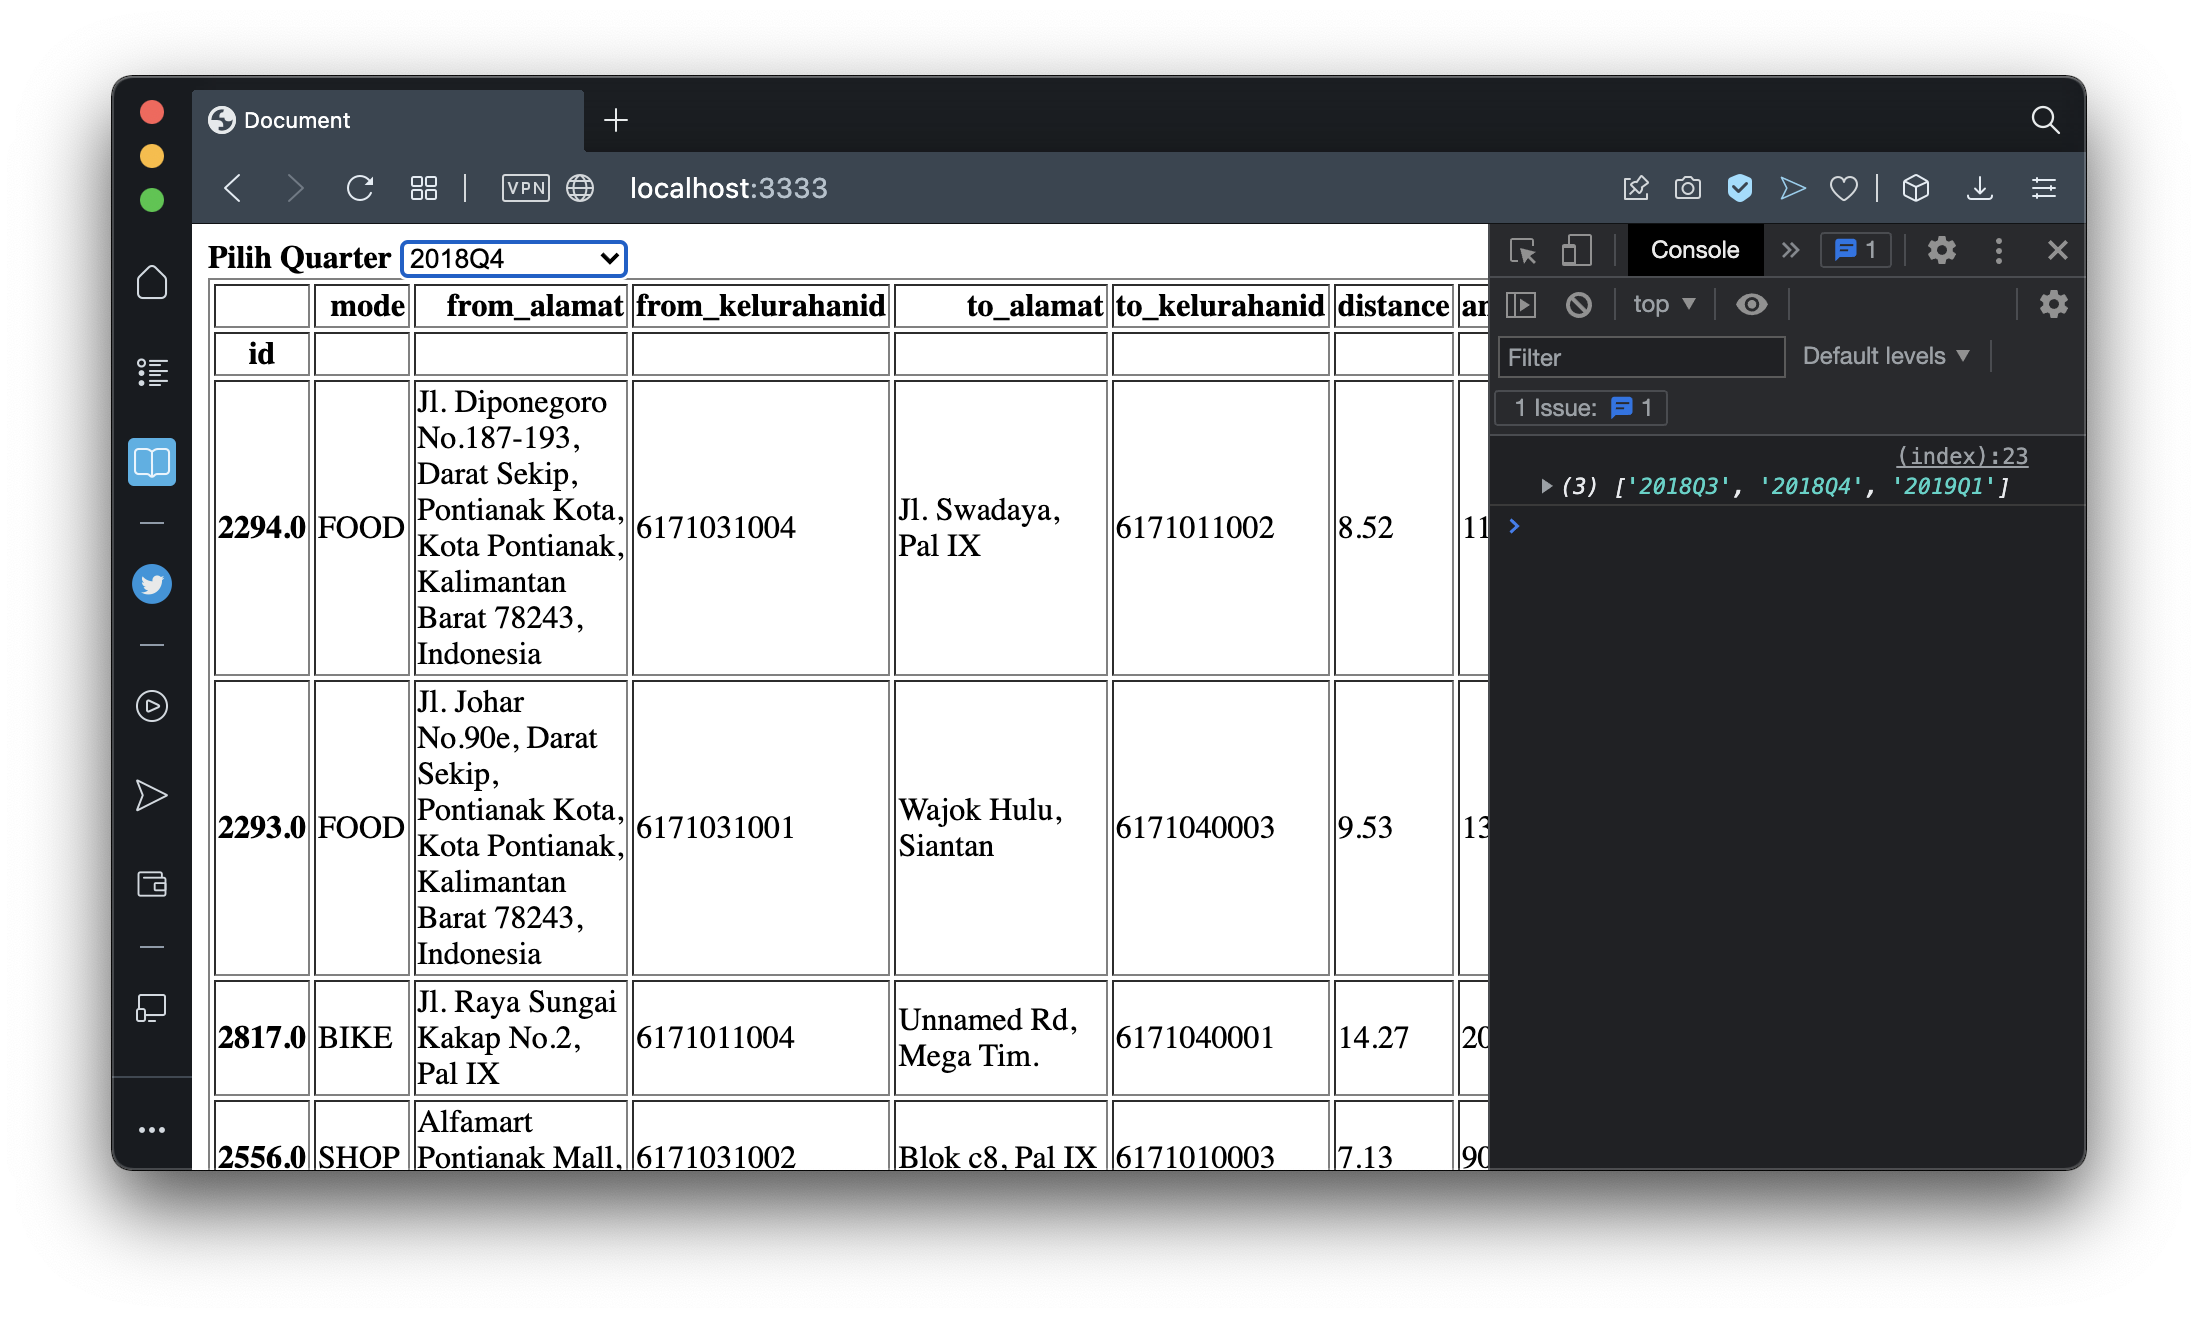

In [58]:
# Hasil
Image(filename='assets/imgs/result.png', width=980) 

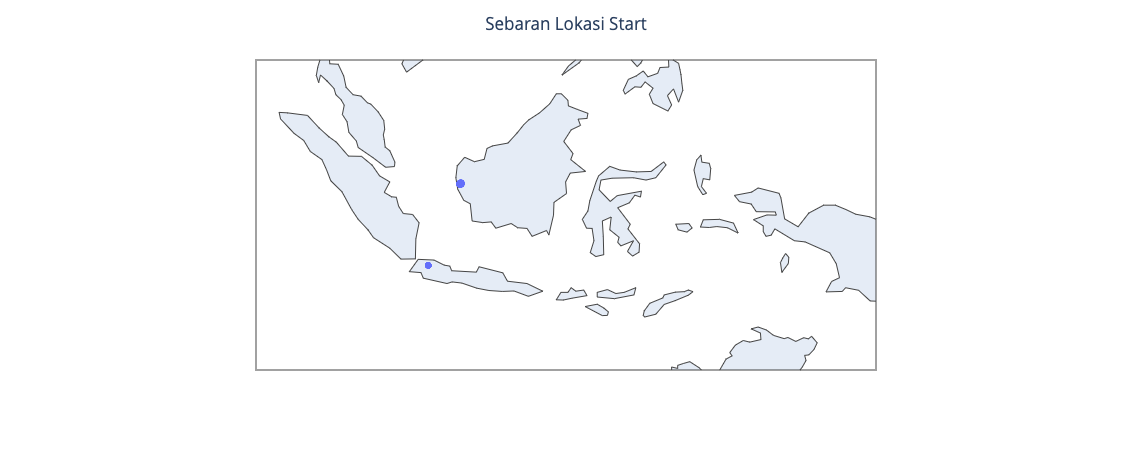

In [97]:
import plotly.express as px
fig = px.scatter_geo(fact_transaction, lat='transaction_from_lat', lon='transaction_from_lng',
                     hover_name="from_alamat")
fig.update_layout(title='Sebaran Lokasi Start', title_x=0.5, geo=dict(
    projection_scale=7.5,  # this is kind of like zoom
    center=dict(lat=-2.462587, lon=117.492602),  # this will center on the point
))
fig.show()


In [99]:
tmpfile = BytesIO()
plt.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8/fFQqAAAACXBIWXMAAAsTAAALEwEAmpwYAAAEVklEQVR4nO3VQQ0AIBDAMMC/58MDH7KkVbDf9swsAKg5vwMA4IWBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJK

<Figure size 432x288 with 0 Axes>